In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
with open("test.png", "rb") as image:
  f = image.read()
  bytestream = bytearray(f)
print(type(bytestream))

image = Image.open(io.BytesIO(bytestream))
print(type(image))
data = np.frombuffer(bytestream, dtype=np.uint8)


def implt(img, cmp=None, t=''):
    """Show image using plt."""
    plt.imshow(img, cmap=cmp)
    plt.title(t)
    plt.show()
    
implt(image)

<class 'bytearray'>
<class 'PIL.PngImagePlugin.PngImageFile'>


<Figure size 640x480 with 1 Axes>

In [39]:
!pip install pillow


     |████████████████████████████████| 2.1MB 1.3MB/s eta 0:00:01


In [2]:
def checkform(bytestream):
    from PIL import Image
    import sys
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import cv2
    import io
    from imutils.perspective import four_point_transform
    from imutils import contours
    import numpy as np
    import imutils
    
    
    SMALL_HEIGHT = 800
    def implt(img, cmp=None, t=''):
        plt.imshow(img, cmap=cmp)
        plt.title(t)
        plt.show()
        
    def resize(img, height=SMALL_HEIGHT, allways=False):
  
        if (img.shape[0] > height or allways):
            rat = height / img.shape[0]
            return cv2.resize(img, (int(rat * img.shape[1]), height))
        return img

    def ratio(img, height=SMALL_HEIGHT):
 
        return img.shape[0] / height



    image = Image.open(io.BytesIO(bytestream))
    pil_image = image.convert('RGB') 
    open_cv_image = np.array(pil_image) 
    # Convert RGB to BGR 
    open_cv_image = open_cv_image[:, :, ::-1].copy() 
    cv2.imwrite('input.jpg',open_cv_image)
    #implt(open_cv_image)
    image = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB)
    print(type(image))
    plt.imshow(image) 
    
    def edges_det(img, min_val, max_val):
 
        img = cv2.cvtColor(resize(img), cv2.COLOR_BGR2GRAY)

    # Applying blur and threshold
        img = cv2.bilateralFilter(img, 9, 75, 75)
        img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 4)
        implt(img, 'gray', 'Adaptive Threshold')

    # Median blur replace center pixel by median of pixels under kelner
    # => removes thin details
        img = cv2.medianBlur(img, 11)

    # Add black border - detection of border touching pages
    # Contour can't touch side of image
        img = cv2.copyMakeBorder(img, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=[0, 0, 0])
        implt(img, 'gray', 'Median Blur + Border')

        return cv2.Canny(img, min_val, max_val)
    
    edges_image = edges_det(image, 200, 250)
# Close gaps between edges (double page clouse => rectangle kernel)
    edges_image = cv2.morphologyEx(edges_image, cv2.MORPH_CLOSE, np.ones((5, 11)))
    implt(edges_image, 'gray', 'Edges')
    
    
    #contour detection ended
    



# define the answer key which maps the question number
# to the correct answer
    ANSWER_KEY = {0: 1, 1: 4, 2: 0, 3: 3, 4: 1}

# load the image, convert it to grayscale, blur it
# slightly, then find edges
    
#print(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 75, 200)
#print(type(edged))
# find contours in the edge map, then initialize
# the contour that corresponds to the document
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    docCnt = None

# ensure that at least one contour was found
    if len(cnts) > 0:
	# sort the contours according to their size in
	# descending order
         cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

	# loop over the sorted contours
         for c in cnts:
		# approximate the contour
               peri = cv2.arcLength(c, True)
               approx = cv2.approxPolyDP(c, 0.02 * peri, True)
		# if our approximated contour has four points,
		# then we can assume we have found the paper
               if len(approx) == 4:
                    docCnt = approx
                    break

# apply a four point perspective transform to both the
# original image and grayscale image to obtain a top-down
# birds eye view of the paper
    implt(image)
    paper = four_point_transform(image, docCnt.reshape(4, 2))
    warped = four_point_transform(gray, docCnt.reshape(4, 2))
    implt(paper)
    cv2.imwrite("resultImage.jpg", cv2.cvtColor(paper, cv2.COLOR_BGR2RGB))


    img = cv2.imread('resultImage.jpg')
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,50,150,apertureSize = 3)
    minLineLength = 100
    maxLineGap = 10
    lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
    for x1,y1,x2,y2 in lines[0]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    implt(img)
    cv2.imwrite('contour.jpg',img)
    
    # [load_image]
    argv= "input.jpg"
    # Check number of arguments
    print(len(argv))
    if len(argv) < 1:
        print ('Not enough parameters')
        print ('Usage:\nmorph_lines_detection.py < path_to_image >')
    
 # Load the image
    src = cv2.imread(argv, cv2.IMREAD_COLOR)
 # Check if image is loaded fine
    if src is None:
        print ('Error opening image: ' + argv[0])
# Show source image
    plt.imshow(src)
 # [load_image]
    # [gray]
    # Transform source image to gray if it is not already   
    if len(src.shape) != 2:
        gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    else:
        gray = src
    # Show gray image
    plt.imshow(gray)
     # [gray]
    # [bin]
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
    gray = cv2.bitwise_not(gray)
    bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 15, -2)
    # Show binary image
    plt.imshow(bw)  
    ret, thresh = cv2.threshold(bw, 80, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(thresh)

    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print('Number of lines:', len(contours))
    img = cv2.drawContours(bw, contours, -1, (0,255,0), 3)
    plt.imshow(img)
    cv2.imwrite('gray1.png',img)
    
    import cv2 as cv
# [bin]
    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
    horizontal = np.copy(bw)


#plt.imshow(horizontal)

    vertical = np.copy(bw)
    # [init]
    # [horiz]
    # Specify size on horizontal axis
    cols = horizontal.shape[1]
    horizontal_size = cols // 30
    # Create structure element for extracting horizontal lines through morphology operations
    horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
    # Apply morphology operations
    horizontal = cv.erode(horizontal, horizontalStructure)

    plt.imshow(horizontal)

    horizontal = cv.dilate(horizontal, horizontalStructure)
    print(horizontal)
    plt.imshow(horizontal)
    
    
    from functools import reduce

    def Average(lst): 
        return reduce(lambda a, b: a + b, lst) / len(lst) 

    img = cv2.imread('resultImage.jpg')

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(img)
    edges = cv2.Canny(gray,50,150,apertureSize = 3)
    minLineLength = 1
    maxLineGap = 0
    lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)


    x1list=[]
    x2list=[]
    diff=[]
    for i in range(0,len(lines)):
        for x1,y1,x2,y2 in lines[i]:
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
            x1list.append(x1)
            x2list.append(x2)
            diff.append(x2-x1)
    plt.imshow(img)
    avg=Average(diff)

    countdiff=[]
    diffindiff=[]
    for x in diff:
        countdiff.append(diff.count(x))
    
    for x in range(len(diff)-1):
        diffindiff.append(abs(diff[x+1]-diff[x]))

    diffindiff.sort()
    

    cv2.imwrite('houghlines5.jpg',img)
    count=0
    for x in countdiff:
        if x>2:
            count=count+1
    if count>0:
        return("Above image is of a form")
    elif min(diffindiff)<10:
        return("Above image is of a form")
    else:
        return("Not a form")

<class 'numpy.ndarray'>


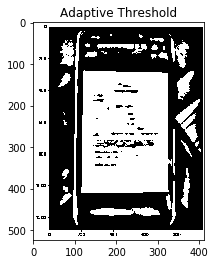

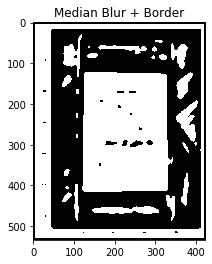

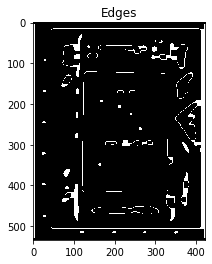

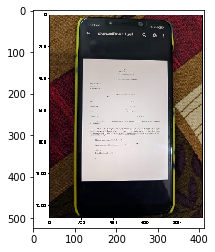

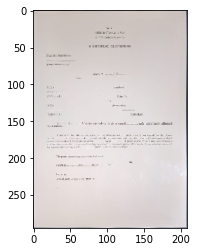

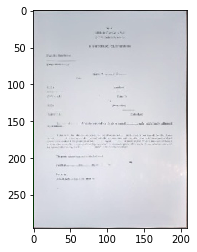

9
Number of lines: 1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Above image is of a form


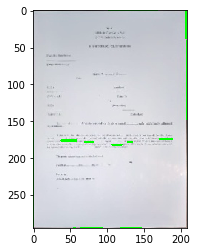

In [3]:
with open("test.png", "rb") as image:
  f = image.read()
  bytestream = bytearray(f)
result = checkform(bytestream)
print(result)